In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('AnimalData.csv')

In [4]:
data.head()

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,...,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
0,K12-000031,1/1/12,Stray,Dog,Spayed,Female,10,Injured or Sick,Chihuahua Sh Mix,N,...,N,18.0,6.0,Toy,Tan & White,3.3,Heartworm Negative,1/7/12,Adoption,6
1,K12-000037,1/1/12,Stray,Dog,Intact,Female,3,Normal,Rat Terrier Mix,N,...,Y,14.0,25.0,Terrier,White & Brown,7.5,No Lab Test,1/3/12,Return to Owner,2
2,K12-000108,1/1/12,Stray,Dog,Intact,Male,2,Normal,Pit Bull Mix,N,...,Y,14.0,90.0,Terrier,Blue & White,74.0,Heartworm Negative,1/13/12,Humane Euthanasia,12
3,K12-000125,1/1/12,Stray,Dog,Neutered,Male,0,Normal,Labrador Retr & Border Collie,N,...,Y,12.0,79.0,Sporting,White & Black,22.0,No Lab Test,1/8/12,Adoption,7
4,K12-000157,1/1/12,Stray,Dog,Neutered,Male,3,Injured or Sick,Labrador Retr,N,...,Y,12.0,79.0,Sporting,Black & White,54.0,Heartworm Negative,4/4/12,Adoption,94


In [6]:
# Number of variables in the Dataset
data.shape[1]

24

In [27]:
# How Many of the first 10 animals in the dataset were adopted?
outcome_type = data.columns.get_loc('Outcome.Type')
(data.iloc[0:10, outcome_type] == 'Adoption').sum()

4

In [51]:
# Was the first owner-surrendered animal in the dataset neutered?
data[ data['Intake.Type'] == 'Owner Surrender' ].head(1)
# No

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,...,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
6,K12-000291,1/1/12,Owner Surrender,Dog,Intact,Male,2,Normal,Weimaraner Mix,N,...,Y,13.0,80.0,Sporting,Fawn & White,47.0,Heartworm Positive,1/26/12,Humane Euthanasia,25


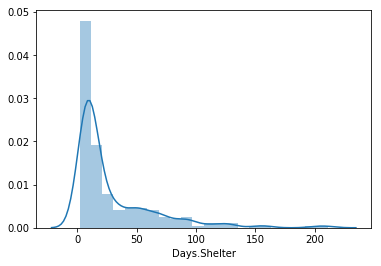

In [28]:
#Distribution of days stayed in the shelter for animals who were adopted

adopted = data['Outcome.Type'] == 'Adoption'
adoptedStay = data['Days.Shelter'][adopted]

sns.distplot(adoptedStay)

In [29]:
# Median of the time an animal waited to be adopted (days)
adoptedStay.median()

13.0

In [32]:
#IQR (Interquartile range - robust measure of spread)
from scipy.stats import iqr

IQR = iqr(adoptedStay)
IQR

# Q1 is the median of the 25th percentile 
# Q3 is the median of the 75th percentile
# IQR = Q3 - Q1

29.0

In [12]:
# the longest stay for an (adopted) animal 
adoptedStay.max()

211

In [33]:
# zscore of that animal

# z = (x - mu) / std
(adoptedStay.max() - adoptedStay.mean()) / adoptedStay.std()

5.088419876405858

In [14]:
data.iloc[adoptedStay.idxmax(),:]

Impound.No                                  K12-020743
Intake.Date                                   11/18/12
Intake.Type                                      Stray
Animal.Type                                        Dog
Neutered.Status                               Neutered
Sex                                               Male
Age.Intake                                           2
Condition                              Injured or Sick
Breed                  Aust Cattle Dog & Labrador Retr
Aggressive                                           Y
Independent                                          N
Intelligent                                          Y
Loyal                                                Y
Social                                               N
Good.with.Kids                                       Y
Max.Life.Expectancy                                 16
Max.Weight                                          35
Dog.Group                                      Herding
Color     

# The Lab

In [35]:
# adult animals
adults = data[data['Age.Intake'] >= 1]
adultDogs = adults[adults['Animal.Type'] == 'Dog']
adultCats = adults[adults['Animal.Type'] == 'Cat']

In [36]:
# How many adult dogs are in the shelter?
adultDogs.shape[0]

226

In [37]:
# How many adult cats are in the shelter?
adultCats.shape[0]

56

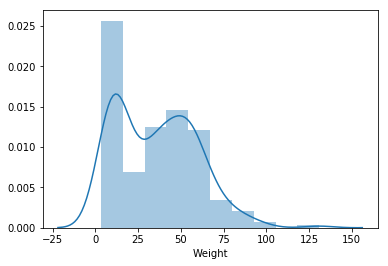

In [38]:
# distribution of the weight of adult dogs
sns.distplot(adultDogs['Weight'])

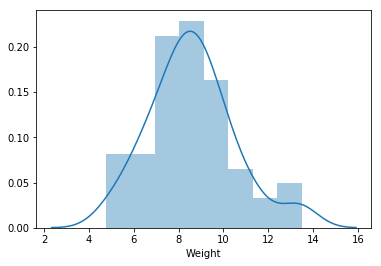

In [39]:
# distribution of adult cats weight
sns.distplot(adultCats['Weight'])

In [40]:
# average weight of adult cats (pounds)
catWeightMean = adultCats.Weight.mean()
catWeightMean

8.603571428571428

In [41]:
# std of the weight of adult cats
catWeightStd = adultCats.Weight.std()
catWeightStd

1.9115167024894406

In [22]:
# What is the z-score of a 13 pound adult cat? 
(13 - catWeightMean) / catWeightStd

2.2999686927678615

In [23]:
# What proportion of adult cats weigh more than 13 pounds, according to your data?
from scipy.stats import norm
1 - norm.cdf(13, catWeightMean, catWeightStd)
# = that's 1%

0.010724996894752037

In [42]:
# What quartile would contain a 13-pound adult dog?
Q2 = adultDogs.Weight.median()
Q2
# answer: Q1

35.25

In [25]:
# IQR of dogs weight
from scipy.stats import iqr
iqr(adultDogs.Weight)

40.375

In [27]:
# median of the cats weight
adultCats.Weight.median()

8.5

In [26]:
# fattest dog (weight in pounds)
adultDogs.Weight.max()

131.0

### Problem Set 


In [57]:
#What was the most common way that dogs arrived in the shelter?
data[data['Animal.Type'] == 'Dog']['Intake.Type'].value_counts()

Stray                 189
Owner Surrender        81
Public Assist          20
Euthanasia Request      1
Name: Intake.Type, dtype: int64

In [29]:
# What proportion of dogs were brought to the shelter as an owner surrender?
81 / (189 + 81 + 20 + 1)
# 27.83%

0.27835051546391754

In [54]:
# Of the dogs that were brought to the shelter as an owner surrender, how many were returned to their owner?
allDogs = data[ data['Animal.Type'] == 'Dog']

surrenderDog = allDogs[ allDogs['Intake.Type'] == 'Owner Surrender']

surrenderReturned = surrenderDog[ surrenderDog['Outcome.Type'] == 'Return to Owner']

surrenderReturned.shape[0]

2

In [55]:
# What was the mean number of days that the dogs referenced in the previous question spent at the shelter before being returned to their owner?
surrenderReturned['Days.Shelter'].mean()

3.5